In [ ]:
Predict the number of deaths due to covid-19 Pandemic in Americas region. 
Use the following methodology with respective performance evaluation metrics such as ;
    r-squared, 
    F-1 Scores, 
    correlations, 
    p-values  RMSE :
    
1.	Correlations
2.	Descriptive statistics
3.	Simple linear Regression
4.	Multiple Linear Regression
5.	Decision Trees Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time 
import datetime
import operator
plt.style.use("seaborn")
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\D1 TELECOM LTD'

In [4]:
os.chdir("C:\\Users\\D1 TELECOM LTD\\Desktop\\brian\\MASTERS IN BIG DATA ANALYSIS")
os.getcwd()

'C:\\Users\\D1 TELECOM LTD\\Desktop\\brian\\MASTERS IN BIG DATA ANALYSIS'

In [5]:
# loading the data set
df = pd.read_csv('WHO _ COVID-19 .csv')
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,200174883,2568.142235,4219657,54.136059,658630,4255892,54.600936,65404,0.8391,10215
1,United States of America,Americas,35125227,10611.770000,651439,196.810000,114820,609613,184.170000,2927,0.8800,591
2,India,South-East Asia,31812114,2305.220000,284000,20.580000,42982,426290,30.890000,3628,0.2600,533
3,Brazil,Americas,19985817,9402.460000,236744,111.380000,32316,558432,262.720000,6597,3.1000,1209
4,Russian Federation,Europe,6379904,4371.760000,161402,110.600000,23120,162509,111.360000,5532,3.7900,794


In [6]:
# loading the data set

df.tail()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
233,Saint Helena,Africa,0,0.0,0,0.0,0,0,0.0,0,0.0,0
234,Tokelau,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0
235,Tonga,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0
236,Turkmenistan,Europe,0,0.0,0,0.0,0,0,0.0,0,0.0,0
237,Tuvalu,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0


In [7]:
df.shape

(238, 12)

In [8]:
df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

In [9]:
df.describe()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,2.380000e+02,237.000000,2.380000e+02,237.000000,238.000000,2.380000e+02,237.000000,238.000000,237.000000,238.000000
mean,1.682142e+06,3926.470178,3.545930e+04,108.427325,5534.705882,3.576380e+04,63.738696,549.613445,0.990756,85.840336
std,1.337386e+07,4240.079182,2.786684e+05,248.579351,43646.547202,2.826436e+05,82.490086,4353.031918,2.159494,680.603387
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.068000e+03,283.210000,5.625000e+01,3.890000,0.000000,4.425000e+01,3.120000,0.000000,0.000000,0.000000
50%,5.390850e+04,2447.820000,8.795000e+02,36.560000,101.000000,8.800000e+02,30.340000,6.500000,0.170000,0.000000
75%,3.901368e+05,6903.670000,6.425500e+03,108.490000,848.250000,6.443750e+03,98.810000,81.250000,0.950000,9.000000
max,2.001749e+08,19150.970000,4.219657e+06,2731.410000,658630.000000,4.255892e+06,596.260000,65404.000000,19.840000,10215.000000


In [10]:
df.isnull().sum()


Name                                                            0
WHO Region                                                      1
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  1
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     1
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 1
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    1
Deaths - newly reported in last 24 hours                        0
dtype: int64

In [11]:
df['WHO Region'].value_counts().to_frame()

,WHO Region
Europe,62
Americas,56
Africa,50
Western Pacific,35
Eastern Mediterranean,22
South-East Asia,11
Other,1


In [12]:
df=df[df["WHO Region"]=="Americas"]
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
1,United States of America,Americas,35125227,10611.77,651439,196.81,114820,609613,184.17,2927,0.88,591
3,Brazil,Americas,19985817,9402.46,236744,111.38,32316,558432,262.72,6597,3.10,1209
8,Argentina,Americas,4961880,10978.64,85953,190.18,14850,106447,235.52,2095,4.64,402
9,Colombia,Americas,4807979,9449.11,60204,118.32,6929,121484,238.75,2002,3.93,268
16,Mexico,Americas,2880409,2234.04,108563,84.20,18911,241936,187.65,2857,2.22,657


In [13]:
df.tail()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
214,Falkland Islands (Malvinas),Americas,63,1808.79,3,86.13,2,0,0.0,0,0.0,0
215,Saint Pierre and Miquelon,Americas,28,483.18,0,0.00,0,0,0.0,0,0.0,0
217,Montserrat,Americas,21,420.08,0,0.00,0,1,20.0,0,0.0,0
218,Sint Eustatius,Americas,20,637.15,0,0.00,0,0,0.0,0,0.0,0
220,Saba,Americas,8,413.86,1,51.73,1,0,0.0,0,0.0,0


In [14]:
df.shape

(56, 12)

In [15]:
df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

In [16]:
df.isnull().sum()

Name                                                            0
WHO Region                                                      0
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  0
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     0
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 0
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    0
Deaths - newly reported in last 24 hours                        0
dtype: int64

In [17]:
df.describe()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.391149e+06,4609.253929,23568.553571,188.505000,3781.160714,36071.446429,84.724643,357.875000,1.696429,64.053571
std,5.379878e+06,3621.482992,93145.424613,433.127081,16051.741821,115817.710003,98.880572,1067.827839,3.147188,203.251606
min,8.000000e+00,119.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.438750e+03,1491.317500,32.750000,22.617500,0.000000,27.000000,15.722500,0.000000,0.000000,0.000000
50%,2.072550e+04,3765.015000,458.000000,62.395000,16.000000,287.500000,66.540000,6.000000,0.795000,0.000000
75%,3.891705e+05,7441.595000,5941.000000,154.102500,726.250000,6194.750000,102.882500,92.000000,1.957500,9.500000
max,3.512523e+07,13505.310000,651439.000000,2731.410000,114820.000000,609613.000000,596.260000,6597.000000,19.840000,1209.000000


In [18]:
df.loc[ 1:]

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
1,United States of America,Americas,35125227,10611.77,651439,196.81,114820,609613,184.17,2927,0.88,591
3,Brazil,Americas,19985817,9402.46,236744,111.38,32316,558432,262.72,6597,3.10,1209
8,Argentina,Americas,4961880,10978.64,85953,190.18,14850,106447,235.52,2095,4.64,402
9,Colombia,Americas,4807979,9449.11,60204,118.32,6929,121484,238.75,2002,3.93,268
16,Mexico,Americas,2880409,2234.04,108563,84.20,18911,241936,187.65,2857,2.22,657
19,Peru,Americas,2116652,6419.57,10281,31.18,2207,196598,596.26,540,1.64,80
24,Chile,Americas,1619183,8470.21,7266,38.01,726,35671,186.60,495,2.59,31
25,Canada,Americas,1433775,3798.87,5858,15.52,733,26607,70.50,47,0.12,6
49,Ecuador,Americas,489089,2772.13,5356,30.36,0,31694,179.64,240,1.36,0
50,Bolivia (Plurinational State of),Americas,475265,4071.48,5241,44.90,727,17882,153.19,166,1.42,23


In [19]:
#using linear regression model 
import numpy as np
from sklearn.linear_model import LinearRegression

In [20]:
# linear regression model using the Cases feature and caculate the R^2 for Deaths 
#sns.regplot(x="Cases", y="Deaths", data=df2)
#plt.ylim(0, )
X = df[['Cases - cumulative total']]
Y = df['Deaths - cumulative total']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)


0.8792308876889582

In [21]:
#How  identified cases help us predict deaths 
X = df[['Cases - cumulative total']]
Y = df['Deaths - cumulative total']
lm = LinearRegression()
lm
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([717033.41254925, 411426.6486584 , 108150.84283307, 105044.17047466,
        66133.90713725])

In [22]:
lm.intercept_

7989.469991278296

In [23]:
lm.coef_

array([0.02018617])

In [24]:
#total cumulative cases  in the last 14 days feature and caculate the R^2 for Deaths
X = df[['Cases - cumulative total']]
Y = df['Deaths - cumulative total']
lm1 = LinearRegression()
lm1
lm1.fit(X,Y)
Yhat=lm.predict(X)
lm1.score(X, Y)


0.8792308876889582

In [25]:
#Cases - cumulative total_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.8792308876889582


In [26]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [717033.41254925 411426.6486584  108150.84283307 105044.17047466]


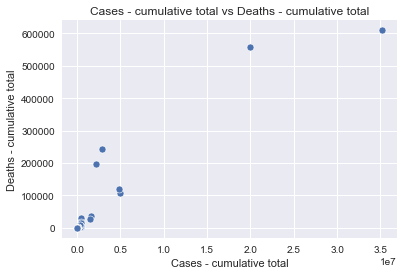

In [27]:
#data visualization


import seaborn as sns
import matplotlib.pyplot as plt 

sns.scatterplot(x = "Cases - cumulative total", y = "Deaths - cumulative total", data = df )
plt.xlabel("Cases - cumulative total")
plt.ylabel("Deaths - cumulative total")
plt.title("Cases - cumulative total vs Deaths - cumulative total")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error


In [29]:
mse = mean_squared_error(df['Deaths - cumulative total'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  1591037749.0452864


In [30]:
#Let's develop a model using these variables as the predictor variables
Z = df[['Cases - cumulative total', 'Deaths - newly reported in last 24 hours']]

In [32]:
lm.fit(Z, df['Deaths - cumulative total'])

LinearRegression()

In [33]:
lm.intercept_

1937.9946583516867

In [34]:
lm.coef_

array([1.30814647e-02, 2.48779021e+02])

In [35]:
# fit the model 
lm.fit(Z, df['Deaths - cumulative total'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['Deaths - cumulative total']))

The R-square is:  0.9609258623760905


In [36]:
Y_predict_multifit = lm.predict(Z)

In [37]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['Deaths - cumulative total'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  514770927.6103273


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 220
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          56 non-null     object 
 1   WHO Region                                                    56 non-null     object 
 2   Cases - cumulative total                                      56 non-null     int64  
 3   Cases - cumulative total per 100000 population                56 non-null     float64
 4   Cases - newly reported in last 7 days                         56 non-null     int64  
 5   Cases - newly reported in last 7 days per 100000 population   56 non-null     float64
 6   Cases - newly reported in last 24 hours                       56 non-null     int64  
 7   Deaths - cumulative total                                     56 non-nul

In [39]:
df.isna()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
1,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False,False,False,False,False
49,False,False,False,False,False,False,False,False,False,False,False,False
50,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
df.isna().any()

Name                                                            False
WHO Region                                                      False
Cases - cumulative total                                        False
Cases - cumulative total per 100000 population                  False
Cases - newly reported in last 7 days                           False
Cases - newly reported in last 7 days per 100000 population     False
Cases - newly reported in last 24 hours                         False
Deaths - cumulative total                                       False
Deaths - cumulative total per 100000 population                 False
Deaths - newly reported in last 7 days                          False
Deaths - newly reported in last 7 days per 100000 population    False
Deaths - newly reported in last 24 hours                        False
dtype: bool

In [41]:
df.isna().sum()

Name                                                            0
WHO Region                                                      0
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  0
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     0
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 0
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    0
Deaths - newly reported in last 24 hours                        0
dtype: int64

In [42]:
df['Cases - cumulative total']

1      35125227
3      19985817
8       4961880
9       4807979
16      2880409
19      2116652
24      1619183
25      1433775
49       489089
50       475265
51       453367
53       437744
56       422614
57       411123
60       381853
61       377446
65       343186
69       308452
71       301700
93       148198
110       87498
119       53639
125       39162
131       30449
136       25549
138       23667
139       22643
141       21125
142       20326
149       15046
152       14284
153       13757
157       11877
169        7890
175        5652
181        4691
184        4422
188        2824
189        2797
190        2589
193        2500
194        2486
196        2297
197        1686
198        1335
199        1311
204         644
205         600
208         218
210         169
213         114
214          63
215          28
217          21
218          20
220           8
Name: Cases - cumulative total, dtype: int64

In [43]:
df.median()

Cases - cumulative total                                        20725.500
Cases - cumulative total per 100000 population                   3765.015
Cases - newly reported in last 7 days                             458.000
Cases - newly reported in last 7 days per 100000 population        62.395
Cases - newly reported in last 24 hours                            16.000
Deaths - cumulative total                                         287.500
Deaths - cumulative total per 100000 population                    66.540
Deaths - newly reported in last 7 days                              6.000
Deaths - newly reported in last 7 days per 100000 population        0.795
Deaths - newly reported in last 24 hours                            0.000
dtype: float64

In [44]:
# Imputing missing values with their respective columns median
df.fillna(df.median(), inplace=True)

In [45]:
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
1,United States of America,Americas,35125227,10611.77,651439,196.81,114820,609613,184.17,2927,0.88,591
3,Brazil,Americas,19985817,9402.46,236744,111.38,32316,558432,262.72,6597,3.10,1209
8,Argentina,Americas,4961880,10978.64,85953,190.18,14850,106447,235.52,2095,4.64,402
9,Colombia,Americas,4807979,9449.11,60204,118.32,6929,121484,238.75,2002,3.93,268
16,Mexico,Americas,2880409,2234.04,108563,84.20,18911,241936,187.65,2857,2.22,657


In [46]:
#Randomly select a single row: df = df.sample()

In [47]:
#Randomly select a single row:

In [49]:
df = df.sample()
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
208,Dominica,Americas,218,302.82,8,11.11,0,0,0.0,0,0.0,0


In [51]:
#Allow a random selection of the same row more than once 
#(by setting replace=True): df = df.sample(n=3,replace=True)

In [52]:
df = df.sample(n=1)

In [53]:
print(df)

         Name WHO Region  Cases - cumulative total  \
208  Dominica   Americas                       218   

     Cases - cumulative total per 100000 population  \
208                                          302.82   

     Cases - newly reported in last 7 days  \
208                                      8   

     Cases - newly reported in last 7 days per 100000 population  \
208                                              11.11             

     Cases - newly reported in last 24 hours  Deaths - cumulative total  \
208                                        0                          0   

     Deaths - cumulative total per 100000 population  \
208                                              0.0   

     Deaths - newly reported in last 7 days  \
208                                       0   

     Deaths - newly reported in last 7 days per 100000 population  \
208                                                0.0              

     Deaths - newly reported in last 24 hours  
208 

In [54]:
# let us Randomly select a specified number of rows. For example, to select 1 random row, set n=1:

In [55]:
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
208,Dominica,Americas,218,302.82,8,11.11,0,0,0.0,0,0.0,0


In [56]:
# Above are the cases reported in Dominica , Americas

In [58]:
#Outlier Detection and Treatment
#Outlier Detection


In [61]:
# Outlier detection using boxplots
#plt.figure(figsize= (20,15))
#plt.subplot(4,4,1)
#sns.boxplot(df['WHO Region'])

#plt.subplot(4,4,2)
#sns.boxplot(df['Cases - cumulative total'])

#plt.subplot(4,4,3)
#sns.boxplot(df['Cases - cumulative total per 100000 population'])

#plt.subplot(4,4,4)
#sns.boxplot(df['Cases - newly reported in last 7 days'])

#plt.subplot(4,4,5)
#sns.boxplot(df['Cases - newly reported in last 7 days per 100000 population'])

#plt.subplot(4,4,6)
#sns.boxplot(df['Cases - newly reported in last 24 hours'])

#plt.subplot(4,4,7)
#sns.boxplot(df['Deaths - cumulative total'])

#plt.subplot(4,4,8)
#sns.boxplot(df['Deaths - cumulative total per 100000 population'])

#plt.subplot(4,4,9)
#sns.boxplot(df['Deaths - newly reported in last 7 days'])

#plt.subplot(4,4,10)
#sns.boxplot(df['Deaths - newly reported in last 7 days per 100000 population'])

#plt.subplot(4,4,11)
#sns.boxplot(df['Deaths - newly reported in last 24 hours'])
note #(C:\Users\D1 TELECOM LTD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  #warnings.warn()


In [62]:
#Use pandas. Series. corr() to find the correlation between two columns

In [63]:
print(df)

         Name WHO Region  Cases - cumulative total  \
208  Dominica   Americas                       218   

     Cases - cumulative total per 100000 population  \
208                                          302.82   

     Cases - newly reported in last 7 days  \
208                                      8   

     Cases - newly reported in last 7 days per 100000 population  \
208                                              11.11             

     Cases - newly reported in last 24 hours  Deaths - cumulative total  \
208                                        0                          0   

     Deaths - cumulative total per 100000 population  \
208                                              0.0   

     Deaths - newly reported in last 7 days  \
208                                       0   

     Deaths - newly reported in last 7 days per 100000 population  \
208                                                0.0              

     Deaths - newly reported in last 24 hours  
208 

In [64]:
correlation_df = df.corr()

In [65]:
print(correlation_df)

                                                    Cases - cumulative total  \
Cases - cumulative total                                                 NaN   
Cases - cumulative total per 100000 population                           NaN   
Cases - newly reported in last 7 days                                    NaN   
Cases - newly reported in last 7 days per 10000...                       NaN   
Cases - newly reported in last 24 hours                                  NaN   
Deaths - cumulative total                                                NaN   
Deaths - cumulative total per 100000 population                          NaN   
Deaths - newly reported in last 7 days                                   NaN   
Deaths - newly reported in last 7 days per 1000...                       NaN   
Deaths - newly reported in last 24 hours                                 NaN   

                                                    Cases - cumulative total per 100000 population  \
Cases - cumulativ

In [66]:
print(correlation_df)

                                                    Cases - cumulative total  \
Cases - cumulative total                                                 NaN   
Cases - cumulative total per 100000 population                           NaN   
Cases - newly reported in last 7 days                                    NaN   
Cases - newly reported in last 7 days per 10000...                       NaN   
Cases - newly reported in last 24 hours                                  NaN   
Deaths - cumulative total                                                NaN   
Deaths - cumulative total per 100000 population                          NaN   
Deaths - newly reported in last 7 days                                   NaN   
Deaths - newly reported in last 7 days per 1000...                       NaN   
Deaths - newly reported in last 24 hours                                 NaN   

                                                    Cases - cumulative total per 100000 population  \
Cases - cumulativ

In [67]:
# find columns using pearson method
df.corr(method ='pearson')

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Cases - cumulative total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases - cumulative total per 100000 population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases - newly reported in last 7 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases - newly reported in last 7 days per 100000 population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases - newly reported in last 24 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deaths - cumulative total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deaths - cumulative total per 100000 population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deaths - newly reported in last 7 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deaths - newly reported in last 7 days per 100000 population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deaths - newly reported in last 24 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
208,Dominica,Americas,218,302.82,8,11.11,0,0,0.0,0,0.0,0


In [70]:
# the columns using kendall method
df.corr(method ='kendall')

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Cases - cumulative total,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases - cumulative total per 100000 population,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases - newly reported in last 7 days,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases - newly reported in last 7 days per 100000 population,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Cases - newly reported in last 24 hours,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Deaths - cumulative total,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Deaths - cumulative total per 100000 population,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Deaths - newly reported in last 7 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Deaths - newly reported in last 7 days per 100000 population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Deaths - newly reported in last 24 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [72]:
#df = np.corrcoef(x, y)

In [73]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
scipy.stats.pearsonr(x, y)    # Pearson's r

(0.7586402890911869, 0.010964341301680832)

In [75]:
#Use Pandas Correlation Matrix
#Correlations

In [76]:
corr = df.corr()

<AxesSubplot:>

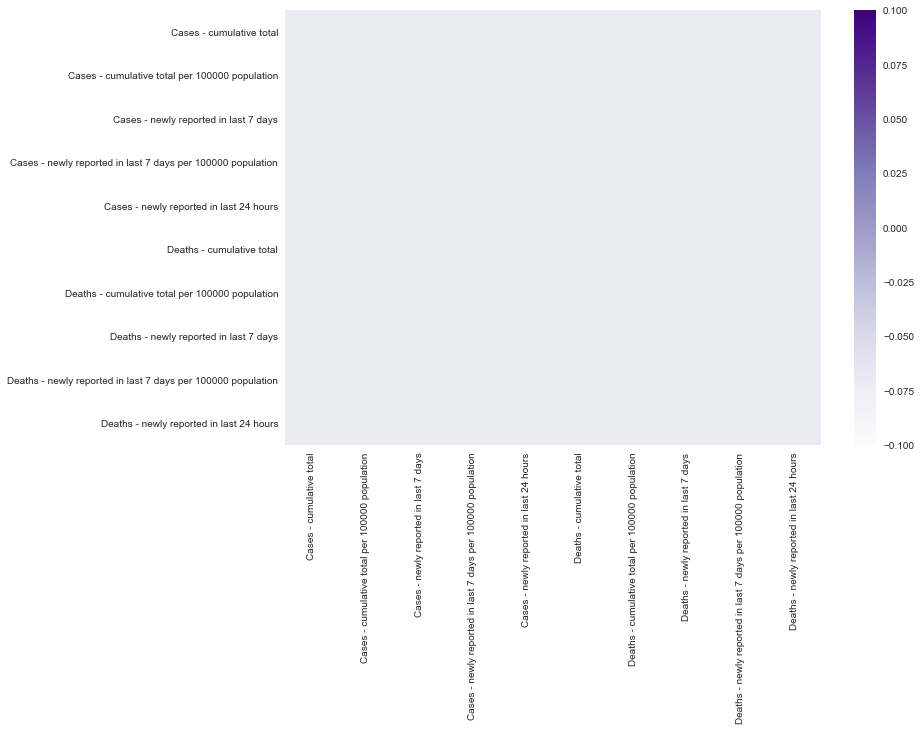

In [81]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Purples",annot=True)

<AxesSubplot:>

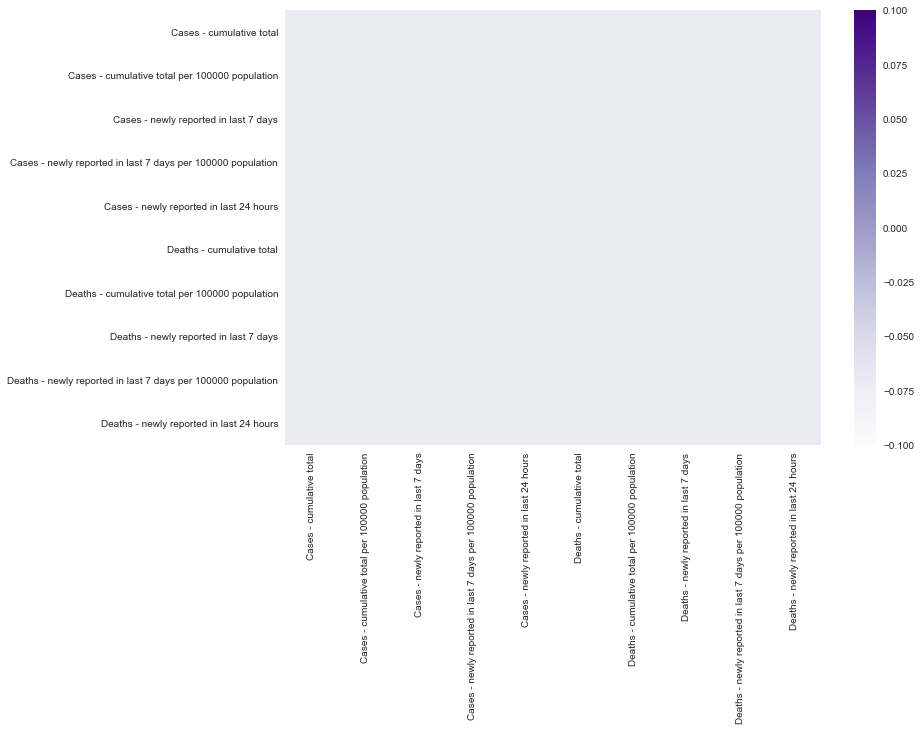

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Purples")

In [83]:
#Degree of correlation:

In [84]:
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

Cases - cumulative total                  Cases - cumulative total                                       NaN
                                          Cases - cumulative total per 100000 population                 NaN
                                          Cases - newly reported in last 7 days                          NaN
                                          Cases - newly reported in last 7 days per 100000 population    NaN
                                          Cases - newly reported in last 24 hours                        NaN
                                                                                                          ..
Deaths - newly reported in last 24 hours  Deaths - cumulative total                                      NaN
                                          Deaths - cumulative total per 100000 population                NaN
                                          Deaths - newly reported in last 7 days                         NaN
                   

In [85]:
# We can also get the means of each row by supplying an axis argument

In [86]:
df.median() 

Cases - cumulative total                                        218.00
Cases - cumulative total per 100000 population                  302.82
Cases - newly reported in last 7 days                             8.00
Cases - newly reported in last 7 days per 100000 population      11.11
Cases - newly reported in last 24 hours                           0.00
Deaths - cumulative total                                         0.00
Deaths - cumulative total per 100000 population                   0.00
Deaths - newly reported in last 7 days                            0.00
Deaths - newly reported in last 7 days per 100000 population      0.00
Deaths - newly reported in last 24 hours                          0.00
dtype: float64

In [87]:
df.mean(axis=1)  

208    53.993
dtype: float64

In [88]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [89]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

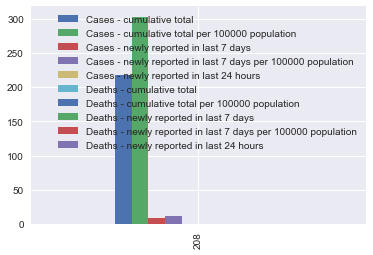

In [90]:
# Make sure figures appear inline in Ipython Notebook
%matplotlib inline
# Create a quick bar chart
df.plot(kind='bar');

In [91]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = numpy.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results

In [92]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Construct the columns for the different powers of x
def get_r2_statsmodels(x, y, k=1):
    xpoly = np.column_stack([x**i for i in range(k+1)])    
    return sm.OLS(y, xpoly).fit().rsquared

# Use the formula API and construct a formula describing the polynomial
def get_r2_statsmodels_formula(x, y, k=1):
    formula = 'y ~ 1 + ' + ' + '.join('I(x**{})'.format(i) for i in range(1, k+1))
    data = {'x': x, 'y': y}
    return smf.ols(formula, data).fit().rsquared # or rsquared_adj

In [94]:
def get_r2_numpy_corrcoef(x, y):
    return np.corrcoef(x, y)[0, 1]**2

In [95]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import math

In [96]:
n=1000
x = np.random.rand(1000)*10
x.sort()
y = 10 * x + (5+np.random.randn(1000)*10-5)

x_list = list(x)
y_list = list(y)

In [97]:
def get_r2_numpy(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    r_squared = 1 - (sum((y - (slope * x + intercept))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
    return r_squared

In [98]:
def get_r2_scipy(x, y):
    _, _, r_value, _, _ = stats.linregress(x, y)
    return r_value**2

In [99]:
def get_r2_statsmodels(x, y):
    return sm.OLS(y, sm.add_constant(x)).fit().rsquared

In [100]:
def get_r2_python(x_list, y_list):
    n = len(x_list)
    x_bar = sum(x_list)/n
    y_bar = sum(y_list)/n
    x_std = math.sqrt(sum([(xi-x_bar)**2 for xi in x_list])/(n-1))
    y_std = math.sqrt(sum([(yi-y_bar)**2 for yi in y_list])/(n-1))
    zx = [(xi-x_bar)/x_std for xi in x_list]
    zy = [(yi-y_bar)/y_std for yi in y_list]
    r = sum(zxi*zyi for zxi, zyi in zip(zx, zy))/(n-1)
    return r**2

In [101]:
def get_r2_numpy_manual(x, y):
    zx = (x-np.mean(x))/np.std(x, ddof=1)
    zy = (y-np.mean(y))/np.std(y, ddof=1)
    r = np.sum(zx*zy)/(len(x)-1)
    return r**2

In [102]:
def get_r2_numpy_corrcoef(x, y):
    return np.corrcoef(x, y)[0, 1]**2

In [103]:
print('Python')
%timeit get_r2_python(x_list, y_list)
print('Numpy polyfit')
%timeit get_r2_numpy(x, y)
print('Numpy Manual')
%timeit get_r2_numpy_manual(x, y)
print('Numpy corrcoef')
%timeit get_r2_numpy_corrcoef(x, y)
print('Scipy')
%timeit get_r2_scipy(x, y)
print('Statsmodels')
%timeit get_r2_statsmodels(x, y)

Python
5.66 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Numpy polyfit
1.24 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Numpy Manual
225 µs ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Numpy corrcoef
269 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Scipy
756 µs ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Statsmodels
1.04 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [105]:
#RMSE:
#It stands for Root Mean Square Error.  

In [106]:
# import all necessery libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [107]:
%%capture
! pip install seaborn

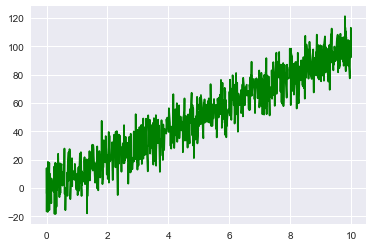

In [108]:
#plotting line
plt.plot(x,y, color='green',label='Linear Regression')

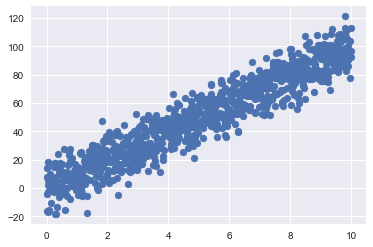

In [117]:
plt.scatter(x,y,)

In [118]:
#x-axis label

Text(0.5, 0, 'head')

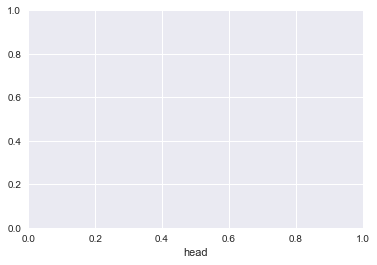

In [127]:
plt.xlabel('head')

Text(0, 0.5, 'head')

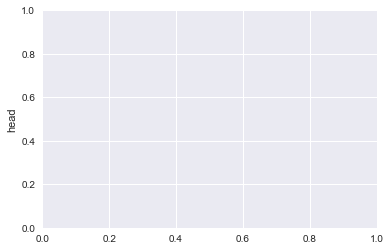

In [126]:
#y-axis label
plt.ylabel('head')

No handles with labels found to put in legend.


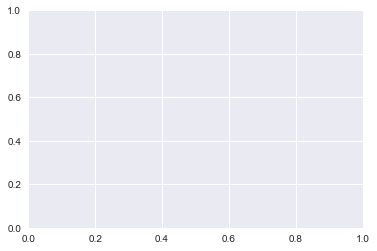

In [128]:
plt.legend()
plt.show()